2024-09-11  17:39:51 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2024-09-11  17:39:51 PESummary WARNING : Tidal deformability parameters found in the posterior table but they are all exactly 0. Assuming this is a BBH system.
2024-09-11  17:39:51 PESummary WARNING : Posterior samples for lambda_1 and lambda_2 found in the posterior table but lambda_1 is always exactly 0. Assuming this is an NSBH system.
2024-09-11  17:39:51 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2024-09-11  17:39:51 PESummary INFO    : Skipping remnant calculations as tidal deformability parameters found in the posterior table.
2024-09-11  17:39:55 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2024-09-11  17:39:55 PESummary INFO    : Skipping remnant calculations as tidal 

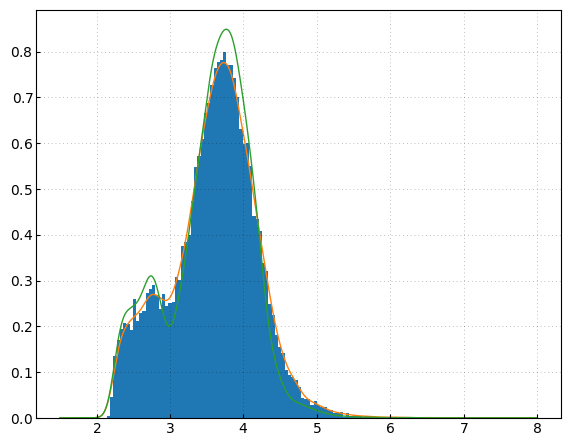

In [24]:
# GW230529
# Import packages
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio") # Turn off some warnings
import numpy as np
from scipy.stats import gaussian_kde
from pesummary.io import read
import matplotlib.pyplot as plt

# Display plots
%matplotlib inline 

# Define paths
fig_dir  = "/Users/marcsalinas/Desktop/FSU_FINITE/LIGO_Paper/"
data_dir = "/Users/marcsalinas/Desktop/FSU_FINITE/LIGO_Paper/"

# Path to parameter estimation results of GW230529 for various waveforms
res_gw230529 = data_dir + "GW230529.h5"

# Import data
gw230529 = read(res_gw230529)

# Load samples into dictionary (uses combined IMRPhenomXPHM and SEOBNRv5PHM high spin samples)
samples = {
    "high_spin" : gw230529.samples_dict["Combined_PHM_highSpin"],
    "low_spin"  : gw230529.samples_dict["Combined_PHM_lowSecondarySpin"],
}

# Evaluate KDE
hs_samples = samples["high_spin"]["mass_1_source"]
ls_samples = samples["low_spin"]["mass_1_source"]
kde_mass_high  = gaussian_kde(hs_samples)
kde_mass_low   = gaussian_kde(ls_samples)

# Set plot limits
m1min, m1max       = 1.5, 8.0
npoints = 1000
m1s    = np.linspace(m1min, m1max, npoints)

# Plot KDEs
plt.figure()
plt.hist(hs_samples,bins=100,density=True)
plt.plot(m1s, kde_mass_high(m1s))
plt.plot(m1s, kde_mass_low(m1s))

with open("GW230529_KDE_HS.txt", 'w') as file:
    for i in range(npoints):
        file.write(f"{m1s[i]}  {kde_mass_high(m1s[i])[0]} \n")

with open("GW230529_KDE_LS.txt", 'w') as file:
    for i in range(npoints):
        file.write(f"{m1s[i]}  {kde_mass_low(m1s[i])[0]} \n")

data structures in posterior_samples: [('recalib_L1_frequency_6', '<f8'), ('recalib_V1_phase_2', '<f8'), ('V1_matched_filter_abs_snr', '<f8'), ('recalib_H1_phase_2', '<f8'), ('recalib_V1_amplitude_0', '<f8'), ('log_likelihood', '<f8'), ('recalib_L1_phase_1', '<f8'), ('recalib_V1_phase_9', '<f8'), ('recalib_H1_frequency_7', '<f8'), ('recalib_L1_frequency_2', '<f8'), ('recalib_V1_amplitude_8', '<f8'), ('recalib_H1_amplitude_0', '<f8'), ('recalib_H1_frequency_2', '<f8'), ('recalib_L1_phase_5', '<f8'), ('spin_1y', '<f8'), ('V1_matched_filter_snr_angle', '<f8'), ('peak_luminosity', '<f8'), ('recalib_L1_frequency_0', '<f8'), ('final_spin', '<f8'), ('recalib_H1_frequency_5', '<f8'), ('V1_optimal_snr', '<f8'), ('recalib_L1_amplitude_2', '<f8'), ('psi', '<f8'), ('phi_2', '<f8'), ('chi_2_in_plane', '<f8'), ('recalib_V1_frequency_3', '<f8'), ('recalib_H1_frequency_9', '<f8'), ('recalib_V1_phase_0', '<f8'), ('recalib_H1_phase_8', '<f8'), ('recalib_H1_frequency_4', '<f8'), ('recalib_V1_amplitude_1'

/var/folders/c7/z26l7xyn1cnb0595y6v37x8c0000gn/T/ipykernel_59492/3789360366.py:22: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


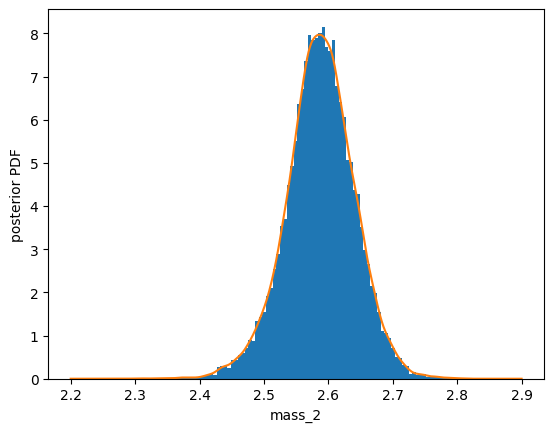

In [2]:
# GW190814 
# import useful python packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

# read in the data
fn = "GW190814.h5"
data = h5py.File(fn,'r')

# extract posterior samples for one of the approximants
posterior_samples = data['combined']['posterior_samples']
print('data structures in posterior_samples:',posterior_samples.dtype)
pnames = [item for item in posterior_samples.dtype.names]
print('parameter names:',pnames)

# get samples for one of the parameters
samples = posterior_samples['mass_2_source']

# smooth it
from scipy.stats.kde import gaussian_kde
hs = gaussian_kde(samples)

m1min, m1max = 2.2, 2.9
npoints = 1000
m2s    = np.linspace(m1min, m1max, npoints)
with open("GW190814_KDE.txt", 'w') as file:
    for i in range(npoints):
        file.write(f"{m2s[i]}  {hs(m2s[i])[0]} \n")

# histogram, and overlay the smoothed PDF
plt.figure()
plt.hist(samples,bins=100,density=True)
plt.plot(m2s,hs(m2s))
plt.xlabel('mass_2')
plt.ylabel('posterior PDF')
plt.show()

data.close()

# release memory for the data
del data

approximants: <KeysViewHDF5 ['C01:IMRPhenomXPHM', 'C01:Mixed', 'history', 'version']>


/var/folders/c7/z26l7xyn1cnb0595y6v37x8c0000gn/T/ipykernel_59492/764315621.py:23: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


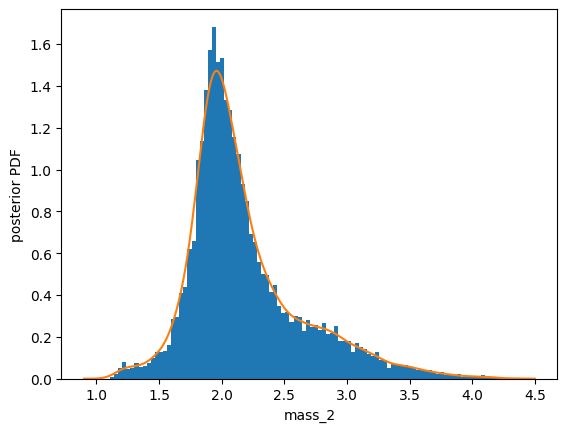

In [6]:
# GW190917
# import useful python packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

# read in the data
fn = "GW190917.h5"
data = h5py.File(fn,'r')

print('approximants:',data.keys())
# extract posterior samples for one of the approximants
posterior_samples = data['C01:Mixed']['posterior_samples']
#print('data structures in posterior_samples:',posterior_samples.dtype)
pnames = [item for item in posterior_samples.dtype.names]
#print('parameter names:',pnames)

# get samples for one of the parameters
samples = posterior_samples['mass_2_source']

# smooth it
from scipy.stats.kde import gaussian_kde
hs = gaussian_kde(samples)

m1min, m1max = 0.9, 4.5
npoints = 1000
m2s    = np.linspace(m1min, m1max, npoints)
with open("GW190917_KDE.txt", 'w') as file:
    for i in range(npoints):
        file.write(f"{m2s[i]}  {hs(m2s[i])[0]} \n")

# histogram, and overlay the smoothed PDF
plt.figure()
plt.hist(samples,bins=100,density=True)
plt.plot(m2s,hs(m2s))
plt.xlabel('mass_2')
plt.ylabel('posterior PDF')
plt.show()

data.close()

# release memory for the data
del data

approximants: <KeysViewHDF5 ['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']>


/var/folders/c7/z26l7xyn1cnb0595y6v37x8c0000gn/T/ipykernel_59492/358445282.py:23: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


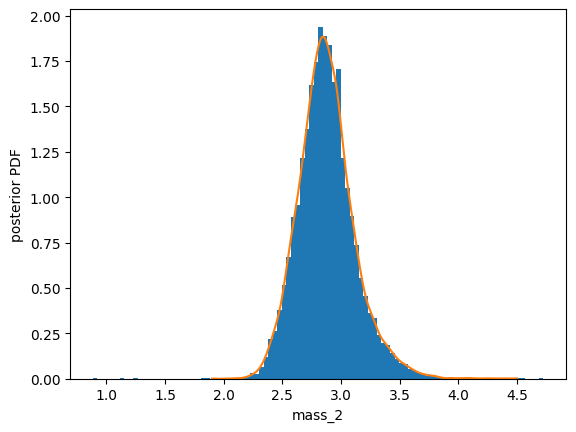

In [9]:
# GW200210
# import useful python packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

# read in the data
fn = "GW200210.h5"
data = h5py.File(fn,'r')

print('approximants:',data.keys())
# extract posterior samples for one of the approximants
posterior_samples = data['C01:SEOBNRv4PHM']['posterior_samples']
#print('data structures in posterior_samples:',posterior_samples.dtype)
pnames = [item for item in posterior_samples.dtype.names]
#print('parameter names:',pnames)

# get samples for one of the parameters
samples = posterior_samples['mass_2_source']

# smooth it
from scipy.stats.kde import gaussian_kde
hs = gaussian_kde(samples)

m1min, m1max = 1.9, 4.5
npoints = 1000
m2s    = np.linspace(m1min, m1max, npoints)
with open("GW200210_KDE.txt", 'w') as file:
    for i in range(npoints):
        file.write(f"{m2s[i]}  {hs(m2s[i])[0]} \n")

# histogram, and overlay the smoothed PDF
plt.figure()
plt.hist(samples,bins=100,density=True)
plt.plot(m2s,hs(m2s))
plt.xlabel('mass_2')
plt.ylabel('posterior PDF')
plt.show()

data.close()

# release memory for the data
del data